## Graphein RNA Graph Construction Tutorial

[API Reference](https://graphein.ai/modules/graphein.rna.html#)

In this notebook we construct graphs of RNA secondary structures.

The inputs we require are a sequence (optional) and a [dotbracket](https://www.tbi.univie.ac.at/RNA/ViennaRNA/doc/html/rna_structure_notations.html) specification of the secondary structure.

The workflow we follow is similar to the other data modalities. The desired edge constructions are passed as a list of functions to the construction function.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/a-r-j/graphein/blob/master/notebooks/rna_graph_tutorial.ipynb)

![](https://www.biorxiv.org/content/biorxiv/early/2021/10/12/2020.07.15.204701/F4.large.jpg?width=800&height=600&carousel=1])


In [1]:
# Install Graphein if necessary
# !pip install graphein

In [2]:
import logging
logging.getLogger("matplotlib").setLevel(logging.WARNING)
logging.getLogger("graphein").setLevel(logging.WARNING)

from typing import List, Callable
import networkx as nx
from graphein.rna.graphs import construct_rna_graph
from graphein.rna.edges import (
    add_all_dotbracket_edges,
    add_pseudoknots,
    add_phosphodiester_bonds,
    add_base_pairing_interactions
)

### Construction with a Dotbracket

Graph construction is handled by the [`construct_rna_graph()`](https://graphein.ai/modules/graphein.rna.html#graphein.rna.graphs.construct_rna_graph) function.


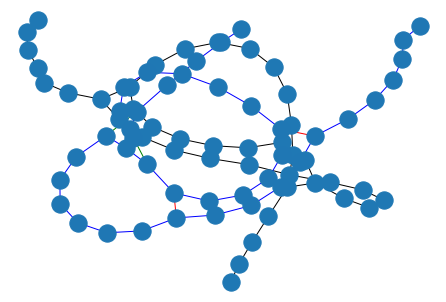

In [3]:
from graphein.rna.visualisation import plot_rna_graph
edge_funcs_1: List[Callable] = [
    add_base_pairing_interactions,
    add_phosphodiester_bonds,
    add_pseudoknots,
]
edge_funcs_2: List[Callable] = [add_all_dotbracket_edges]

g = construct_rna_graph(
    "......((((((......[[[))))))......]]]....",
    sequence=None,
    edge_construction_funcs=edge_funcs_1,
)
nx.draw(g)

plot_rna_graph(g, layout=nx.layout.spring_layout)

### Construction with a dotbracket and sequence

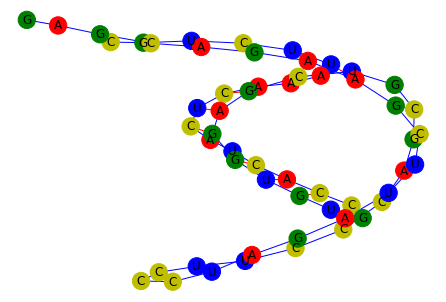

In [4]:
g = construct_rna_graph(
    sequence="CGUCUUAAACUCAUCACCGUGUGGAGCUGCGACCCUUCCCUAGAUUCGAAGACGAG",
    dotbracket="((((((...(((..(((...))))))...(((..((.....))..)))))))))..",
    edge_construction_funcs=edge_funcs_1,
)
plot_rna_graph(g, layout=nx.layout.spring_layout)

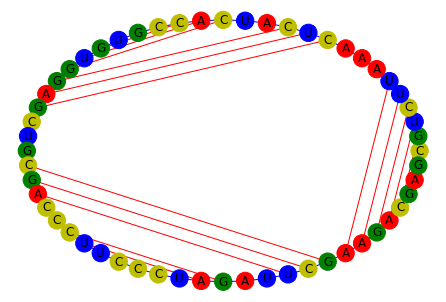

In [5]:
g = construct_rna_graph(
    sequence="CGUCUUAAACUCAUCACCGUGUGGAGCUGCGACCCUUCCCUAGAUUCGAAGACGAG",
    dotbracket="((((((...(((..(((...))))))...(((..((.....))..)))))))))..",
    edge_construction_funcs=edge_funcs_1,
)
plot_rna_graph(g, layout=nx.layout.circular_layout)